<a href="https://colab.research.google.com/github/Fadiassi/Fadiassi/blob/main/we2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required variables
import pandas as pd 
import numpy as np
# sklearn for ML models 
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/content/Adevrtising.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
df[:10]# same as df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [5]:
# Check number of columns and rows 
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 200 rows and 4 columns


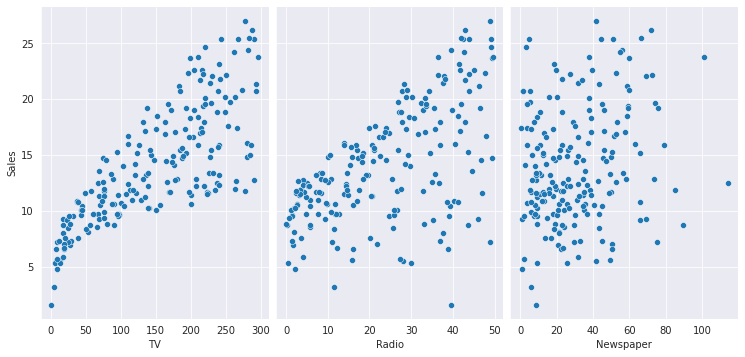

In [6]:
import seaborn as sns
sns.set_style("darkgrid")
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=0.7)

In [7]:
# create X and y
# columns/ features representing 'X'
feature_cols = ['TV']
X = df[feature_cols]
# what you want to learn predict
y = df.Sales

# lets check the type of the new constructs 
print(f'The type of X is {type(X)}')
print(f'The type of y is {type(y)}')

The type of X is <class 'pandas.core.frame.DataFrame'>
The type of y is <class 'pandas.core.series.Series'>


In [8]:
# Initiate and fit
simple_lm = LinearRegression()
simple_lm.fit(X, y)

LinearRegression()

In [9]:
# print the coefficients
print ("iNTERCEPT : ",simple_lm.intercept_)
print ("CO-EFFICIENT : ",simple_lm.coef_)

iNTERCEPT :  7.032593549127695
CO-EFFICIENT :  [0.04753664]


In [10]:
# prediction with sklearn
TV = 230
print(f'Investing {TV} in Tv and Generates {simple_lm.predict([[TV]])} in Sales')

Investing 230 in Tv and Generates [17.96602085] in Sales


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
tv_230s = df.loc[(df['TV'] >= 225) & (df['TV'] <=235)] 
#the above returns all records of tv instment betwen 225 and 235

In [12]:
print(f'Mean sales increase {tv_230s.Sales.mean()}')

Mean sales increase 16.5375


In [13]:
predictions = simple_lm.predict(X)

In [14]:
df_eval = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_eval.head()


,Actual,Predicted
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218


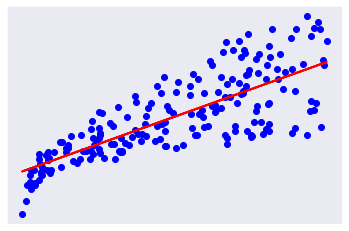

In [15]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(X, y,  color='blue')# actual values from the dataset
plt.plot(X, predictions, color='red', linewidth=2)# predicted values by the model

plt.xticks(())
plt.yticks(())

plt.show()

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))

Mean Absolute Error: 2.549806038927486
Mean Squared Error: 10.512652915656757
Root Mean Squared Error: 3.2423221486546887


In [17]:
import statsmodels.formula.api as sm

# create a fitted model (predict sales given tv investment)
lm1 = sm.ols(formula='Sales ~ TV', data=df).fit()
#  check the coefficients
print(lm1.params)

Intercept    7.032594
TV           0.047537
dtype: float64


In [18]:
# And also we can perform predictions same way 
# Lets check how much sales increase would be if we invest 230 in TV Adverts
X_new = pd.DataFrame({'TV': [230]})
# predict for a new observation
lm1.predict(X_new)

0    17.966021
dtype: float64

In [19]:
# print the p-values for the model coefficients
print(f'The p value is {lm1.pvalues}')

The p value is Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


In [20]:
a = 1.467390e-42
output = f"{a:.50f}"
print('The p-value is ',output)

The p-value is  0.00000000000000000000000000000000000000000146739000


Multiple Linear Regression


In [21]:
# prepare the data 
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [22]:
model = LinearRegression()

In [23]:
model.fit(X, y)
# print  the coefficients
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 2.938889369459412
Coefficients: 
 [ 0.04576465  0.18853002 -0.00103749]


In [24]:
model_coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
model_coeffs

,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


In [25]:
# prediction with sklearn
TV = 2.75
Radio = 5.3
Newspaper = 1000
print(f'Investing {TV} in Tv and {Radio} in Radio and {Newspaper} in Newspaper \
                \n will generate {model.predict([[TV, Radio, Newspaper]])}')

Investing 2.75 in Tv and 5.3 in Radio and 1000 in Newspaper                 
 will generate [3.02645819]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
predictions = model.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))

Mean Absolute Error: 1.252011229687068
Mean Squared Error: 2.784126314510936
Root Mean Squared Error: 1.6685701407225697


In [27]:
new_sales = 2.938889369459412+ (0.04576465*TV) +  (0.18853002*Radio)  -(0.00103749*Newspaper)

In [28]:
print(f'The new Sales value is {new_sales}')

The new Sales value is 3.026461262959412


Note about Linear Models

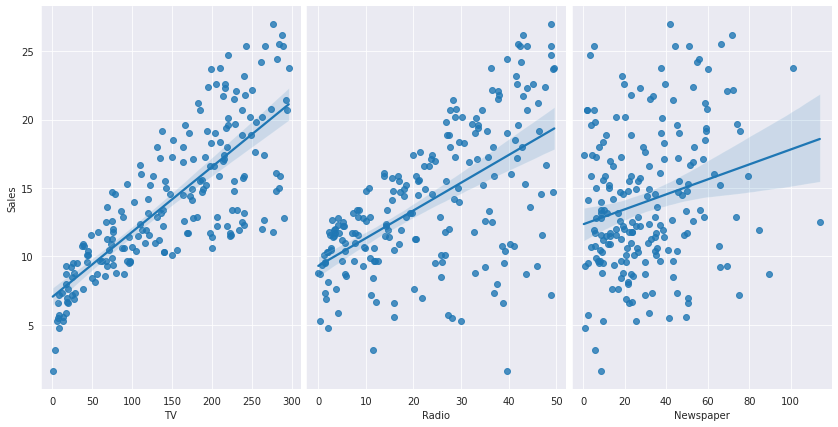

In [29]:
# plot tv, radio and newspapers against sales 
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=6, aspect=0.657, kind='reg')

In [30]:
'''
!pip install streamlit
!streamlit hello
'''

'\n!pip install streamlit\n!streamlit hello\n'

First Application

In [37]:
# import required libraries 
import numpy as np
import pandas as pd

Train-Test Data

In [38]:
# first compute the 80% size of the data
train_size = int(.8 * df.shape[0])# cast to intger
print (f'80% of the {df.shape[0]} is {train_size}')

80% of the 200 is 160


In [39]:
# using slicing to create two data frames as below 
train_df = df[:train_size]
test_df  = df[train_size:]

In [40]:
# Check if the total size of both train and test = the original size 
if ((train_df.shape[0]+test_df.shape[0]) == df.shape[0]):
    print('Split is correct')

Split is correct
